# Descripción del proyecto
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba.

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

# Instrucciones del proyecto
1. Descarga y prepara los datos.  Explica el procedimiento.
2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.
3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.
4. Realiza la prueba final.
5. Descripción de los datos
6. Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos.

# Características

- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado

# Objetivo

- Exited: El cliente se ha ido (1 - sí; 0 - no)

# Importar las librerías

In [ ]:
# Manipulación y exploración de datos
import pandas as pd # Importa la librería pandas para manipulación de datos
import numpy as np # Importa la librería numpy para operaciones numéricas
from scipy.stats import shapiro # Importa la prueba de Shapiro-Wilk para normalidad

# Visualización de datos
import matplotlib.pyplot as plt # Importa matplotlib para la creación de gráficos estáticos
import seaborn as sns # Importa seaborn para visualizaciones estadísticas mejoradas

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split, GridSearchCV # Importa funciones para dividir datos y optimización de hiperparámetros
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Importa herramientas para escalar características y codificación One-Hot
from sklearn.utils import shuffle # Importa función para mezclar datos

# Modelos de machine learning
from sklearn.tree import DecisionTreeClassifier # Importa el clasificador de árbol de decisión
from sklearn.ensemble import RandomForestClassifier # Importa el clasificador de bosque aleatorio
from sklearn.linear_model import LogisticRegression # Importa el modelo de regresión logística

# Métricas de evaluación
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report # Importa métricas para evaluar el rendimiento del modelo

# Carga y Preparación de Datos

En esta sección, se cargarán los datos desde la URL proporcionada y se realizará una exploración inicial para entender su estructura, tipos de datos y la presencia de valores faltantes. Esto es fundamental para la preparación adecuada de los datos antes de cualquier modelado.

In [ ]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_10/data/Churn.csv' # Define la URL del archivo CSV a cargar

In [ ]:
df = pd.read_csv(url) # Carga el archivo CSV desde la URL en un DataFrame de pandas

In [ ]:
df.head() # Muestra las primeras 5 filas del DataFrame para una vista previa

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
df.info() # Muestra un resumen conciso del DataFrame, incluyendo tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum() # Calcula la cantidad de valores faltantes por columna

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,909
Balance,0
NumOfProducts,0


## Manejo de Valores Faltantes

La columna 'Tenure' contiene valores faltantes, lo cual es común en los conjuntos de datos del mundo real. Para asegurar la integridad del conjunto de datos y permitir el entrenamiento del modelo, se imputarán estos valores faltantes. Después de analizar la distribución de 'Tenure', se decidió rellenar los valores faltantes con la moda de la columna, ya que es una variable categórica ordinal.

In [ ]:
df['Tenure'].value_counts() # Cuenta las ocurrencias únicas de cada valor en la columna 'Tenure'

,count
Tenure,
1.0,952
2.0,950
8.0,933
3.0,928
5.0,927
7.0,925
4.0,885
9.0,882
6.0,881


In [ ]:
df['Tenure'].describe() # Muestra estadísticas descriptivas de la columna 'Tenure'

,Tenure
count,9091.000000
mean,4.997690
std,2.894723
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,10.000000


In [ ]:
mode_tenure = df['Tenure'].mode().values[0] # Calcula la moda de la columna 'Tenure'
print(f"La moda de 'Tenure' es: {mode_tenure}") # Imprime el valor de la moda
df['Tenure'] = df['Tenure'].fillna(mode_tenure) # Rellena los valores faltantes en 'Tenure' con la moda
print(f"Valores faltantes en 'Tenure' después de rellenar: {df['Tenure'].isna().sum()}") # Verifica si aún hay valores faltantes

La moda de 'Tenure' es: 1.0
Valores faltantes en 'Tenure' después de rellenar: 0


In [ ]:
df['Tenure'].value_counts() # Vuelve a contar las ocurrencias únicas después de rellenar los valores faltantes

,count
Tenure,
1.0,1861
2.0,950
8.0,933
3.0,928
5.0,927
7.0,925
4.0,885
9.0,882
6.0,881


## Estadísticas Descriptivas

Se presentan estadísticas descriptivas para las columnas numéricas. Esto proporciona un resumen rápido de las propiedades de los datos, como la media, la desviación estándar, los valores mínimos y máximos, y los cuartiles. Estas estadísticas son útiles para identificar posibles anomalías, distribuciones asimétricas o rangos de valores inusuales que podrían requerir un preprocesamiento adicional.

In [ ]:
df.describe() # Muestra las estadísticas descriptivas para todas las columnas numéricas del DataFrame

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.634300,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.989725,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Análisis del Balance de Clases

El objetivo de esta sección es examinar la distribución de la variable objetivo 'Exited'. Es crucial entender si las clases están balanceadas o si existe un desequilibrio significativo. Un desequilibrio de clases puede afectar negativamente el rendimiento del modelo, especialmente para la clase minoritaria, y requerir técnicas de balanceo de clases.

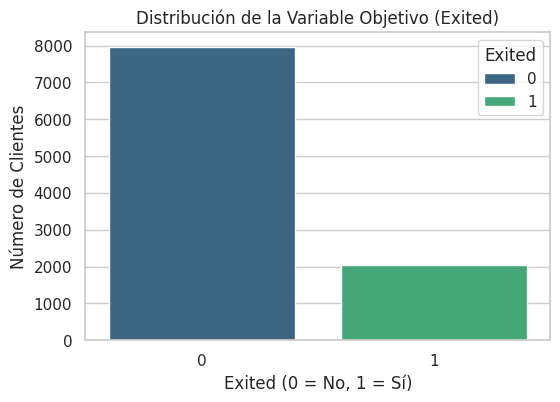

In [ ]:
plt.figure(figsize=(6, 4)) # Crea una nueva figura con un tamaño específico
sns.countplot(x='Exited', data=df, palette='viridis', hue='Exited') # Crea un gráfico de barras de la variable objetivo 'Exited'
plt.title('Distribución de la Variable Objetivo (Exited)') # Establece el título del gráfico
plt.xlabel('Exited (0 = No, 1 = Sí)') # Establece la etiqueta del eje X
plt.ylabel('Número de Clientes') # Establece la etiqueta del eje Y
plt.show() # Muestra el gráfico

## Distribución de Características Numéricas

Se visualiza la distribución de las características numéricas ('CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary') utilizando histogramas. Esto ayuda a comprender la forma de la distribución de cada variable, identificar sesgos, detectar valores atípicos y evaluar si las transformaciones de características son necesarias.

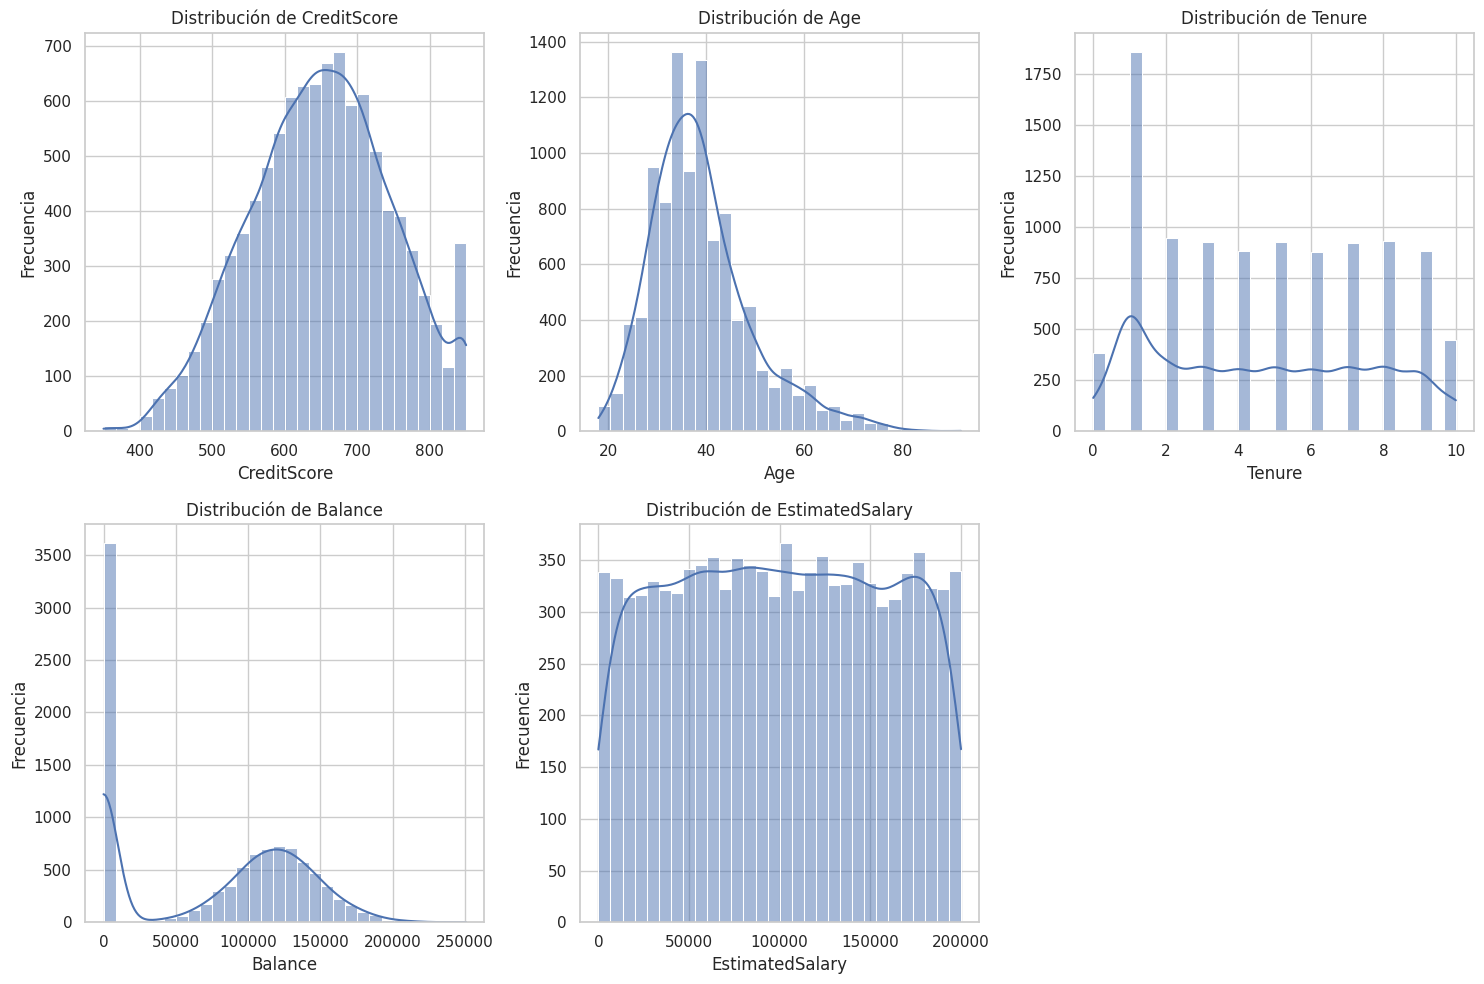

In [ ]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'] # Define una lista de características numéricas

plt.figure(figsize=(15, 10)) # Crea una nueva figura con un tamaño específico
for i, feature in enumerate(numerical_features): # Itera sobre cada característica numérica
    plt.subplot(2, 3, i + 1) # Crea un subplot dentro de la figura
    sns.histplot(df[feature], kde=True, bins=30) # Crea un histograma con estimación de densidad de kernel (KDE)
    plt.title(f'Distribución de {feature}') # Establece el título del subplot
    plt.xlabel(feature) # Establece la etiqueta del eje X
    plt.ylabel('Frecuencia') # Establece la etiqueta del eje Y
plt.tight_layout() # Ajusta automáticamente los parámetros del subplot para un diseño ajustado
plt.show() # Muestra la figura con todos los subplots

## Distribución de Variables Categóricas

Esta sección se enfoca en la visualización de la distribución de las características categóricas ('Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts'). Los gráficos de barras son utilizados para mostrar la frecuencia de cada categoría, lo que permite identificar la representación de diferentes grupos dentro de estas variables.

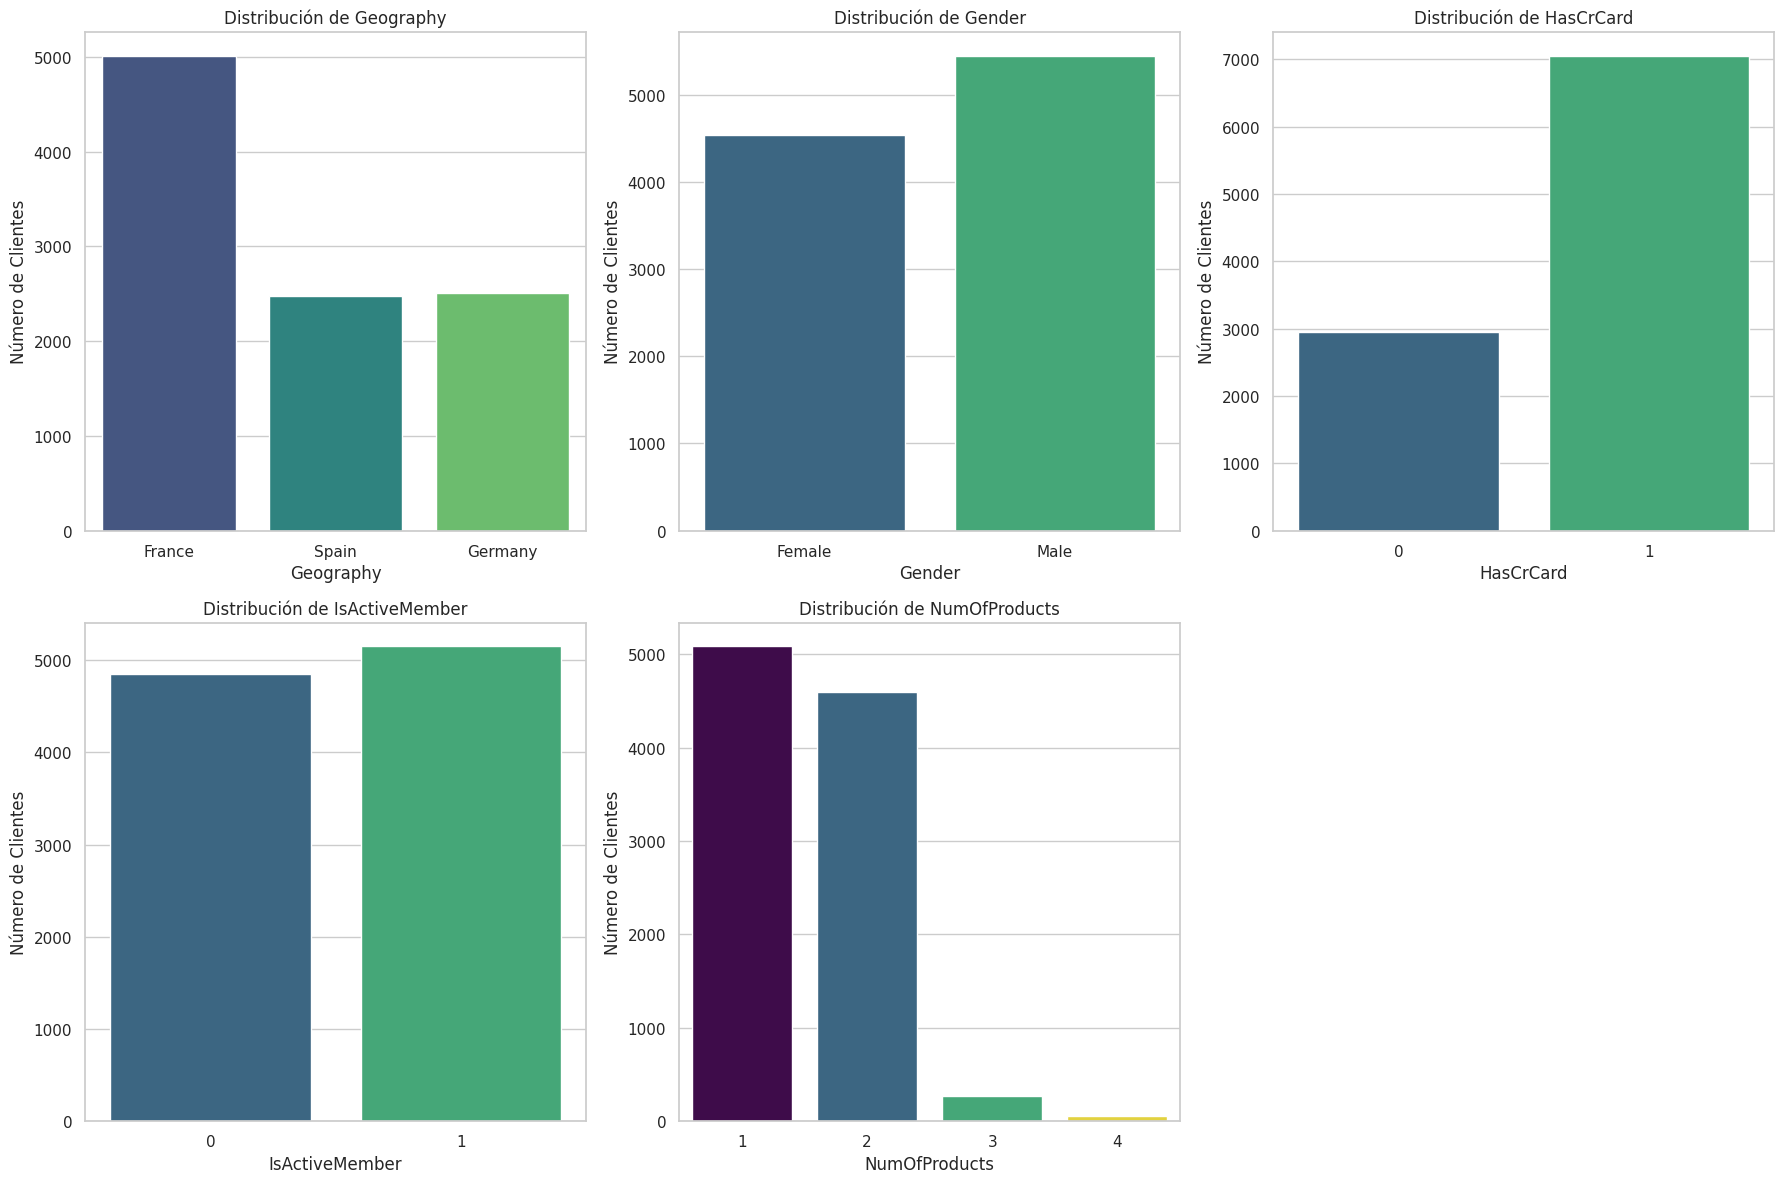

In [ ]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts'] # Define una lista de características categóricas

plt.figure(figsize=(18, 12)) # Crea una nueva figura con un tamaño específico
for i, feature in enumerate(categorical_features): # Itera sobre cada característica categórica
    plt.subplot(2, 3, i + 1) # Crea un subplot dentro de la figura
    sns.countplot(x=feature, data=df, palette='viridis', hue=feature, legend=False) # Crea un gráfico de barras para la característica categórica
    plt.title(f'Distribución de {feature}') # Establece el título del subplot
    plt.xlabel(feature) # Establece la etiqueta del eje X
    plt.ylabel('Número de Clientes') # Establece la etiqueta del eje Y
plt.tight_layout() # Ajusta automáticamente los parámetros del subplot para un diseño ajustado
plt.show() # Muestra la figura con todos los subplots

## Matriz de Correlación

Se calcula y visualiza la matriz de correlación de las características numéricas. Un mapa de calor es una herramienta efectiva para identificar relaciones lineales entre pares de variables. Las correlaciones pueden indicar redundancia entre características o revelar la fuerza y dirección de la relación de las características con la variable objetivo, lo cual es útil para la selección de características y la comprensión del modelo.

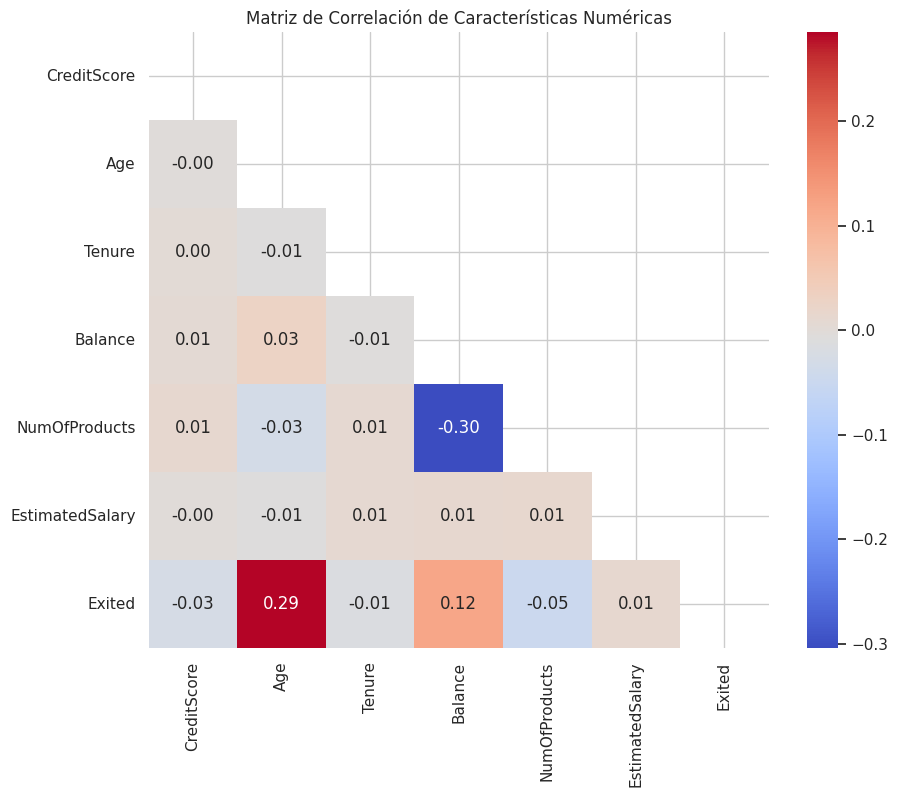

In [ ]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited'] # Define las características numéricas para la matriz de correlación
correlation_matrix = df[numerical_features].corr() # Calcula la matriz de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Crea una máscara para ocultar la parte superior del triángulo de la matriz

plt.figure(figsize=(10, 8)) # Crea una nueva figura con un tamaño específico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask) # Crea un mapa de calor de la matriz de correlación
plt.title('Matriz de Correlación de Características Numéricas') # Establece el título del mapa de calor
plt.show() # Muestra el mapa de calor

# Codificación One-Hot (One Hot Encoding)

Las características categóricas como 'Geography' y 'Gender' no pueden ser utilizadas directamente por la mayoría de los algoritmos de Machine Learning, ya que esperan entradas numéricas. Para transformar estas variables categóricas en un formato numérico adecuado, se aplica la técnica de **One-Hot Encoding**. Esto crea nuevas columnas binarias para cada categoría, donde un '1' indica la presencia de esa categoría y un '0' su ausencia.

Se utiliza `drop_first=True` para evitar la multicolinealidad, eliminando una de las columnas binarias generadas para cada característica original. Por ejemplo, para 'Gender', se creará una columna 'Gender_Male', y la información de 'Female' se inferirá cuando 'Gender_Male' sea 0.

In [ ]:
df_ohe = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True) # Aplica codificación One-Hot a las columnas 'Geography' y 'Gender', eliminando la primera categoría para evitar multicolinealidad

In [ ]:
df_ohe.head() # Muestra las primeras 5 filas del DataFrame después de la codificación One-Hot

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


# Preparar el Modelo

En esta sección, se prepararán los datos para el entrenamiento de los modelos de Machine Learning. Esto incluye la separación de las características de la variable objetivo, la división del conjunto de datos en subconjuntos de entrenamiento, validación y prueba, y el escalado de las características numéricas.

## Separación de Características y Variable Objetivo

Las columnas 'RowNumber', 'CustomerId' y 'Surname' son identificadores o texto libre que no aportan valor predictivo directo para el modelo. Por lo tanto, se eliminan del conjunto de características (`features`). La columna 'Exited' se designa como la variable objetivo (`target`), ya que es lo que queremos predecir (si un cliente abandona o no).

In [ ]:
# Separar características (X) y la variable objetivo (y)
features = df_ohe.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1) # Elimina columnas irrelevantes y la variable objetivo para crear el conjunto de características
target = df_ohe['Exited'] # Define la variable objetivo 'Exited'

## División de Datos en Conjuntos de Entrenamiento, Validación y Prueba

Para asegurar una evaluación robusta del modelo y evitar el sobreajuste (overfitting), el conjunto de datos se divide en tres partes:

1.  **Conjunto de Entrenamiento (70%)**: Utilizado para entrenar el modelo.
2.  **Conjunto de Validación (15%)**: Utilizado para ajustar los hiperparámetros del modelo y comparar el rendimiento de diferentes modelos durante el desarrollo.
3.  **Conjunto de Prueba (15%)**: Mantenido completamente separado y utilizado solo para la evaluación final del modelo, proporcionando una estimación imparcial de su rendimiento en datos no vistos.

In [ ]:
features_train, features_i, target_train, target_i = train_test_split(features, target, test_size=0.3, random_state=12345) # Divide los datos en conjuntos de entrenamiento (70%) y un conjunto intermedio (30%)
features_valid, features_test, target_valid, target_test = train_test_split(features_i, target_i, test_size=0.5, random_state=12345) # Divide el conjunto intermedio en conjuntos de validación (15%) y prueba (15%)

In [ ]:
print(f'Tamaño del conjunto de entrenamiento features: {features_train.shape}') # Imprime el tamaño del conjunto de características de entrenamiento
print(f'Tamaño del conjunto de entrenamiento target: {target_train.shape}\n') # Imprime el tamaño del conjunto de la variable objetivo de entrenamiento
print('-'*70)

print(f'\nTamaño del conjunto de validación features: {features_valid.shape}') # Imprime el tamaño del conjunto de características de validación
print(f'Tamaño del conjunto de validación target: {target_valid.shape}\n') # Imprime el tamaño del conjunto de la variable objetivo de validación
print('-'*70)

print(f'\nTamaño del conjunto de prueba features: {features_test.shape}') # Imprime el tamaño del conjunto de características de prueba
print(f'Tamaño del conjunto de prueba target: {target_test.shape}') # Imprime el tamaño del conjunto de la variable objetivo de prueba

Tamaño del conjunto de entrenamiento features: (7000, 11)
Tamaño del conjunto de entrenamiento target: (7000,)

----------------------------------------------------------------------

Tamaño del conjunto de validación features: (1500, 11)
Tamaño del conjunto de validación target: (1500,)

----------------------------------------------------------------------

Tamaño del conjunto de prueba features: (1500, 11)
Tamaño del conjunto de prueba target: (1500,)


### Verificación del Balance de Clases en los Conjuntos Divididos

Después de dividir los datos, es importante verificar el balance de clases en cada uno de los conjuntos (entrenamiento, validación y prueba). Un desequilibrio persistente en estos conjuntos indica que las técnicas de balanceo de clases deberán aplicarse en el conjunto de entrenamiento para mejorar el rendimiento del modelo, especialmente en la predicción de la clase minoritaria.

In [ ]:
# Balance de clases para el dataset de entrenamiento
print('-'*10, 'Entrenamiento', '-'*10)
print(f'Balance negativo: {round(target_train[target_train == 0].count() * 100 / len(target_train), 3)}%') # Calcula y muestra el porcentaje de la clase negativa en el conjunto de entrenamiento
print(f'Balance positivo: {round(target_train[target_train == 1].count() * 100 / len(target_train), 3)}%\n') # Calcula y muestra el porcentaje de la clase positiva en el conjunto de entrenamiento

# Balance de clases para el dataset de test
print('-'*10, 'Test', '-'*10)
print(f'Balance negativo: {round(target_test[target_test == 0].count() * 100 / len(target_test), 3)}%') # Calcula y muestra el porcentaje de la clase negativa en el conjunto de prueba
print(f'Balance positivo: {round(target_test[target_test == 1].count() * 100 / len(target_test), 3)}%\n') # Calcula y muestra el porcentaje de la clase positiva en el conjunto de prueba

# Balance de clases para el dataset de validación
print('-'*10, 'Validación', '-'*10)
print(f'Balance negativo: {round(target_valid[target_valid == 0].count() * 100 / len(target_valid), 3)}%') # Calcula y muestra el porcentaje de la clase negativa en el conjunto de validación
print(f'Balance positivo: {round(target_valid[target_valid == 1].count() * 100 / len(target_valid), 3)}%\n') # Calcula y muestra el porcentaje de la clase positiva en el conjunto de validación

---------- Entrenamiento ----------
Balance negativo: 79.843%
Balance positivo: 20.157%

---------- Test ----------
Balance negativo: 78.733%
Balance positivo: 21.267%

---------- Validación ----------
Balance negativo: 79.533%
Balance positivo: 20.467%



## Escalado de Características Numéricas (StandardScaler)

Las características numéricas a menudo tienen diferentes rangos y unidades. Para evitar que las características con valores más grandes dominen el proceso de entrenamiento del modelo y para asegurar que los algoritmos basados en distancia (como SVM o K-NN) o gradiente (como Regresión Logística) funcionen correctamente, se aplica el **escalado de características**.

Aquí se utiliza `StandardScaler`, que estandariza las características al eliminar la media y escalar a la varianza unitaria. Es crucial aplicar `fit_transform` solo en el conjunto de entrenamiento y luego `transform` en los conjuntos de validación y prueba para evitar la fuga de datos (data leakage) del conjunto de prueba al entrenamiento.

In [ ]:
scaler = StandardScaler() # Inicializa el escalador estándar
features_train_scaled = scaler.fit_transform(features_train) # Ajusta el escalador y transforma las características de entrenamiento
features_valid_scaled = scaler.transform(features_valid) # Transforma las características de validación usando el escalador ajustado
features_test_scaled = scaler.transform(features_test) # Transforma las características de prueba usando el escalador ajustado

# Convierte los arreglos escalados de nuevo a DataFrames para preservar los nombres de las características
features_train = pd.DataFrame(features_train_scaled, columns=features.columns) # Convierte el arreglo de entrenamiento escalado de nuevo a DataFrame
features_valid = pd.DataFrame(features_valid_scaled, columns=features.columns) # Convierte el arreglo de validación escalado de nuevo a DataFrame
features_test = pd.DataFrame(features_test_scaled, columns=features.columns) # Convierte el arreglo de prueba escalado de nuevo a DataFrame

# Modelos de Machine Learning y Funciones de Evaluación

En esta sección, se definen las funciones clave para evaluar el rendimiento de los modelos y se introducen los algoritmos de Machine Learning que se utilizarán para predecir si un cliente abandonará el banco.

### Función `evaluar_modelo`

Esta función es esencial para obtener una visión completa del rendimiento de cualquier modelo de clasificación. Calcula y muestra métricas clave como el F1-Score, el AUC-ROC, la matriz de confusión y el reporte de clasificación. Estas métricas son fundamentales para entender cómo el modelo predice ambas clases, especialmente en un contexto de desequilibrio de clases.

In [ ]:
def evaluar_modelo(modelo, X_test, y_test):
    """
    Evalúa un modelo de clasificación usando F1, AUC-ROC, matriz de confusión
    y reporte de clasificación.

    Parámetros:
        modelo : modelo entrenado (fit)
        X_test : características del conjunto de prueba
        y_test : etiquetas reales del conjunto de prueba
    """

    # Predicciones de clase
    y_pred = modelo.predict(X_test)

    # Probabilidades para clase positiva (para AUC-ROC)
    try:
        y_proba = modelo.predict_proba(X_test)[:, 1] # Intenta obtener probabilidades para AUC-ROC
    except:
        # Algunos modelos no tienen predict_proba
        y_proba = None # Si no hay predict_proba, establece y_proba como None

    # Métricas principales
    f1 = f1_score(y_test, y_pred) # Calcula el F1-Score
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "No disponible" # Calcula el AUC-ROC si las probabilidades están disponibles

    # Resultados
    print("===== Evaluación del Modelo =====")
    print(f"F1 Score: {f1:.4f}") # Imprime el F1-Score
    print(f"AUC-ROC: {auc}") # Imprime el AUC-ROC
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred)) # Imprime la matriz de confusión
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred)) # Imprime el reporte de clasificación

    return f1, auc # Retorna el F1-Score y el AUC-ROC

### Función `graficar_roc`

La curva ROC (Receiver Operating Characteristic) y el Área Bajo la Curva (AUC-ROC) son métricas importantes para evaluar modelos de clasificación binaria, especialmente cuando hay un desequilibrio de clases. Esta función visualiza la curva ROC, mostrando la relación entre la Tasa de Verdaderos Positivos (True Positive Rate - TPR) y la Tasa de Falsos Positivos (False Positive Rate - FPR) en diferentes umbrales de clasificación. Un AUC-ROC más cercano a 1 indica un mejor rendimiento del modelo.

In [ ]:
def graficar_roc(target, predicted, label):
    """
    Grafica la curva ROC y calcula el área bajo la curva (AUC).

    Parámetros:
        target (pd.Series): Etiquetas reales del conjunto de prueba.
        predicted (pd.Series): Etiquetas predichas por el modelo.
        label (str): Etiqueta para la curva ROC.
    """

    fpr, tpr, _ = roc_curve(target, predicted) # Calcula la Tasa de Falsos Positivos (FPR) y la Tasa de Verdaderos Positivos (TPR)
    auc = roc_auc_score(target, predicted) # Calcula el Área bajo la Curva ROC (AUC)

    sns.set(style="whitegrid") # Establece el estilo de los gráficos de seaborn

    plt.figure(figsize=(8, 6)) # Crea una nueva figura con un tamaño específico
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", linewidth=2) # Grafica la curva ROC
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Grafica la línea de referencia aleatoria
    plt.xlabel("False Positive Rate") # Establece la etiqueta del eje X
    plt.ylabel("True Positive Rate") # Establece la etiqueta del eje Y
    plt.title(f"Receiver Operating Characteristic (ROC) Curve para el modelo {label}") # Establece el título del gráfico
    plt.legend() # Muestra la leyenda
    plt.show() # Muestra el gráfico

## Clasificador de Árbol de Decisión (Decision Tree Classifier)

El Árbol de Decisión es un modelo de Machine Learning versátil que puede usarse tanto para tareas de clasificación como de regresión. Construye un modelo en forma de estructura de árbol, donde cada nodo interno representa una "prueba" sobre un atributo, cada rama representa el resultado de la prueba, y cada nodo hoja representa una etiqueta de clase. Es relativamente fácil de entender e interpretar.

In [ ]:
tree = DecisionTreeClassifier(random_state=12345) # Inicializa un clasificador de árbol de decisión
tree.fit(features_train, target_train) # Entrena el modelo con los datos de entrenamiento

DecisionTreeClassifier(random_state=12345)

In [ ]:
tree_predicted = tree.predict(features_test) # Realiza predicciones en el conjunto de prueba

In [ ]:
tree_f1, tree_auc = evaluar_modelo(tree, features_test, target_test) # Evalúa el modelo de árbol de decisión

===== Evaluación del Modelo =====
F1 Score: 0.4838
AUC-ROC: 0.6728384903076134

Matriz de Confusión:
[[1008  173]
 [ 162  157]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1181
           1       0.48      0.49      0.48       319

    accuracy                           0.78      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.78      0.78      0.78      1500



### Curva ROC para el Árbol de Decisión sin Balanceo

La curva ROC y el valor AUC-ROC nos permiten visualizar y cuantificar la capacidad del modelo para distinguir entre las clases positiva y negativa. Un valor AUC-ROC por encima de 0.5 indica que el modelo es mejor que una clasificación aleatoria.

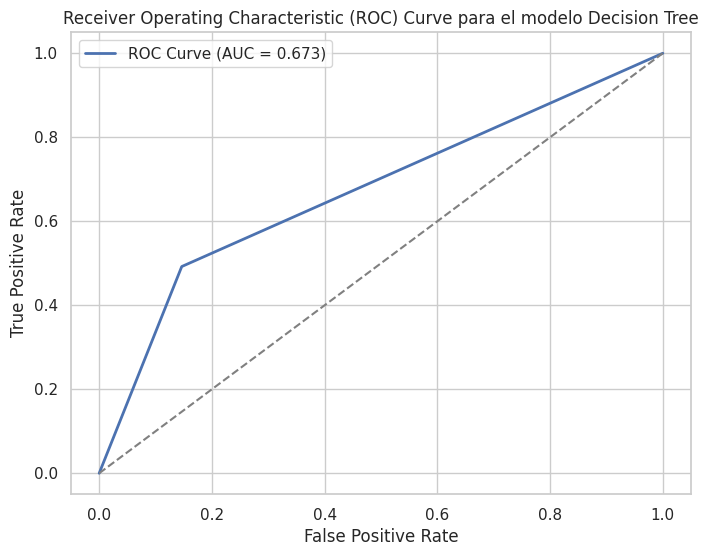

In [ ]:
graficar_roc(target_test, tree_predicted, 'Decision Tree') # Grafica la curva ROC para el modelo de Árbol de Decisión

## Clasificador de Bosque Aleatorio (Random Forest Classifier)

El Bosque Aleatorio es un método de aprendizaje conjunto que construye múltiples árboles de decisión durante el entrenamiento y genera la clase que es el modo de las clases (clasificación) o la predicción media (regresión) de los árboles individuales. Es conocido por su alta precisión y su capacidad para manejar el sobreajuste.

In [ ]:
forest = RandomForestClassifier(random_state=12345) # Inicializa un clasificador de Bosque Aleatorio
forest.fit(features_train, target_train) # Entrena el modelo con los datos de entrenamiento

RandomForestClassifier(random_state=12345)

In [ ]:
forest_predicted = forest.predict(features_test) # Realiza predicciones en el conjunto de prueba

In [ ]:
forest_f1, forest_auc = evaluar_modelo(forest, features_test, target_test) # Evalúa el modelo de Bosque Aleatorio

===== Evaluación del Modelo =====
F1 Score: 0.5429
AUC-ROC: 0.8470426475623708

Matriz de Confusión:
[[1135   46]
 [ 183  136]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1181
           1       0.75      0.43      0.54       319

    accuracy                           0.85      1500
   macro avg       0.80      0.69      0.73      1500
weighted avg       0.84      0.85      0.83      1500



### Curva ROC para el Bosque Aleatorio sin Balanceo

Se visualiza la curva ROC para el modelo de Bosque Aleatorio sin balanceo. Esto nos proporciona una medida visual y cuantitativa de su capacidad de discriminación entre las clases, lo cual es crucial para comprender su rendimiento en un escenario de desequilibrio de clases.

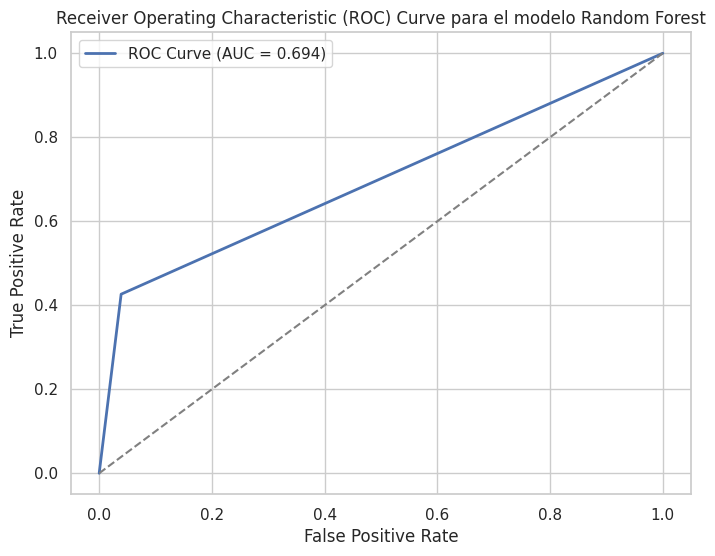

In [ ]:
graficar_roc(target_test, forest_predicted, 'Random Forest') # Grafica la curva ROC para el modelo de Bosque Aleatorio

## Regresión Logística (Logistic Regression)

La Regresión Logística es un algoritmo de clasificación lineal que modela la probabilidad de que una instancia de entrada pertenezca a una clase determinada. A pesar de su nombre, se utiliza para tareas de clasificación binaria. Es un modelo simple, eficiente y una buena línea base para problemas de clasificación.

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear') # Inicializa un modelo de Regresión Logística con un solver específico
model.fit(features_train, target_train) # Entrena el modelo con los datos de entrenamiento

LogisticRegression(random_state=12345, solver='liblinear')

In [ ]:
log_reg_predicted = model.predict(features_test) # Realiza predicciones en el conjunto de prueba

In [ ]:
log_reg_f1, log_reg_auc = evaluar_modelo(model, features_test, target_test) # Evalúa el modelo de Regresión Logística

===== Evaluación del Modelo =====
F1 Score: 0.2776
AUC-ROC: 0.7394403021720608

Matriz de Confusión:
[[1134   47]
 [ 260   59]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1181
           1       0.56      0.18      0.28       319

    accuracy                           0.80      1500
   macro avg       0.69      0.57      0.58      1500
weighted avg       0.76      0.80      0.75      1500



### Curva ROC para la Regresión Logística sin Balanceo

La curva ROC para la Regresión Logística sin balanceo nos ayuda a entender su capacidad predictiva. Un AUC-ROC cercano a 0.5 indicaría que el modelo no es mucho mejor que adivinar al azar, lo que podría confirmarse si el desequilibrio de clases afecta significativamente su rendimiento.

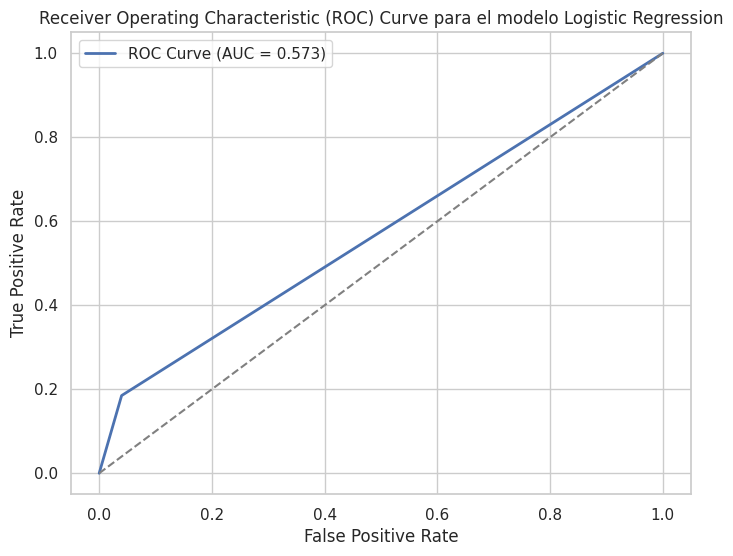

In [ ]:
graficar_roc(target_test, log_reg_predicted, 'Logistic Regression') # Grafica la curva ROC para el modelo de Regresión Logística

# Comparación de Modelos sin Balanceo de Clases

En esta sección, se comparan los resultados de los tres modelos de clasificación entrenados sin aplicar ninguna técnica para manejar el desequilibrio de clases. El objetivo es establecer una línea base y observar cómo el desequilibrio afecta el rendimiento de cada algoritmo, especialmente en términos del F1 Score y el AUC-ROC.

In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'], # Nombres de los modelos
    'F1 Score': [tree_f1, forest_f1, log_reg_f1], # F1-Scores de cada modelo
    'AUC-ROC': [tree_auc, forest_auc, log_reg_auc] # AUC-ROC de cada modelo
}) # Crea un DataFrame para comparar los resultados de los modelos

print("\nComparación de Modelos (sin balanceo de clases):\n") # Imprime un encabezado
display(model_comparison) # Muestra el DataFrame de comparación


Comparación de Modelos (sin balanceo de clases):



,Model,F1 Score,AUC-ROC
0,Decision Tree,0.483821,0.672838
1,Random Forest,0.542914,0.847043
2,Logistic Regression,0.277647,0.739440


### Observaciones de la Comparación:

*   **Random Forest** tiene el mejor rendimiento en términos de F1 Score y AUC-ROC, lo que sugiere que es el modelo más prometedor de los tres sin aplicar técnicas de balanceo.
*   **Decision Tree** tiene un F1 Score aceptable, pero inferior al Random Forest.
*   **Logistic Regression** tiene un F1 Score muy bajo y un AUC-ROC apenas superior a 0.5, lo que indica un rendimiento deficiente, probablemente debido al desequilibrio de clases y a la naturaleza lineal del modelo en este conjunto de datos.

Estos resultados confirman la necesidad de abordar el desequilibrio de clases para mejorar el rendimiento de los modelos, especialmente para la clase minoritaria.

# Balanceo de Clases

Dado el desequilibrio observado en la variable objetivo 'Exited', es crucial aplicar técnicas de balanceo de clases para mejorar el rendimiento del modelo, especialmente en la predicción de la clase minoritaria (clientes que abandonan). En esta sección, se implementarán dos enfoques comunes: **Oversampling** y **Undersampling**.

### Función `oversampling`

El **Oversampling** es una técnica que aumenta el número de instancias de la clase minoritaria en el conjunto de entrenamiento. La función `oversampling` toma las características y etiquetas, identifica la clase minoritaria y la replica un número `repeat` de veces. Finalmente, mezcla los datos resultantes para asegurar la aleatoriedad y evitar patrones de aprendizaje no deseados.

In [ ]:
def oversampling(features, target, repeat : int):
    """
    Realiza el oversampling de la clase minoritaria.

    Parámetros:
        features (pd.DataFrame): Características del conjunto de datos.
        target (pd.Series): Etiquetas del conjunto de datos.
        repeat (int): Número de veces a repetir la clase minoritaria.
    """


    features_zeros = features[target == 0] # Filtra las características de la clase mayoritaria (0)
    features_ones = features[target == 1] # Filtra las características de la clase minoritaria (1)
    target_zeros = target[target == 0] # Filtra las etiquetas de la clase mayoritaria (0)
    target_ones = target[target == 1] # Filtra las etiquetas de la clase minoritaria (1)

    # Realiza el oversampling
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # Concatena las características, replicando la clase minoritaria
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) # Concatena las etiquetas, replicando la clase minoritaria

    # Mezcla las observaciones
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) # Mezcla los datos para asegurar la aleatoriedad

    # Retorna los datos con oversampling
    return features_upsampled, target_upsampled # Retorna las características y etiquetas con oversampling

### Función `undersampling`

El **Undersampling** es una técnica que reduce el número de instancias de la clase mayoritaria en el conjunto de entrenamiento. La función `undersampling` toma las características y etiquetas, identifica la clase mayoritaria y la submuestra a una `ratio` especificada. Esto iguala la proporción de clases, y luego los datos se mezclan. Esta técnica es útil cuando se tienen grandes conjuntos de datos y el oversampling podría generar un coste computacional excesivo.

In [ ]:
def undersampling(features, target, ratio : float):
    """
    Realiza el undersampling de la clase mayoritaria.

    Parámetros:
        _features (pd.DataFrame): Características del conjunto de datos.
        _target (pd.Series): Etiquetas del conjunto de datos.
        ratio (float): Proporción de la clase mayoritaria a mantener.
    """


    features_zeros = features[target == 0] # Filtra las características de la clase mayoritaria (0)
    features_ones = features[target == 1] # Filtra las características de la clase minoritaria (1)
    target_zeros = target[target == 0] # Filtra las etiquetas de la clase mayoritaria (0)
    target_ones = target[target == 1] # Filtra las etiquetas de la clase minoritaria (1)

    features_downsampled = pd.concat([features_zeros.sample(frac=ratio, random_state=12345)] + [features_ones]) # Realiza undersampling en la clase mayoritaria y concatena
    target_downsampled = pd.concat([target_zeros.sample(frac=ratio, random_state=12345)] + [target_ones]) # Realiza undersampling en las etiquetas de la clase mayoritaria y concatena

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345) # Mezcla los datos para asegurar la aleatoriedad

    return features_downsampled, target_downsampled # Retorna las características y etiquetas con undersampling

## Aplicación de Oversampling y Undersampling

Se aplican las funciones de `oversampling` y `undersampling` a los conjuntos de entrenamiento y prueba. Es importante recordar que las técnicas de balanceo de clases deben aplicarse solo a los datos de entrenamiento para evitar la fuga de información del conjunto de prueba. Sin embargo, para fines de demostración y comparación de las curvas ROC de los datos balanceados, también se aplicará una versión oversampleada y downsampleada al conjunto de prueba. Para la evaluación final se utilizarán los conjuntos de entrenamiento balanceados con el conjunto de prueba sin balancear (o con el balanceo adecuado a ese dataset).

In [ ]:
features_train_df = pd.DataFrame(features_train, columns=features.columns) # Convierte features_train a DataFrame
features_test_df = pd.DataFrame(features_test, columns=features.columns) # Convierte features_test a DataFrame

features_train_upsampled, target_train_upsampled = oversampling(features_train_df, target_train.reset_index(drop=True), 10) # Aplica oversampling a los datos de entrenamiento
features_test_upsampled, target_test_upsampled = oversampling(features_test_df, target_test.reset_index(drop=True), 10) # Aplica oversampling a los datos de prueba

features_train_downsampled, target_train_downsampled = undersampling(features_train_df, target_train.reset_index(drop=True), 0.5) # Aplica undersampling a los datos de entrenamiento
features_test_downsampled, target_test_downsampled = undersampling(features_test_df, target_test.reset_index(drop=True), 0.5) # Aplica undersampling a los datos de prueba

# Pruebas de Modelos con Clases Balanceadas

En esta sección, se reentrenarán y evaluarán los modelos de Árbol de Decisión, Bosque Aleatorio y Regresión Logística utilizando los datos de entrenamiento balanceados (tanto con oversampling como con undersampling). El objetivo es observar cómo estas técnicas afectan las métricas de rendimiento, especialmente el F1-Score y el AUC-ROC, en comparación con los modelos no balanceados.

### Función `graficar_comparacion_roc`

Para facilitar la visualización del impacto de las técnicas de balanceo, se ha creado una función que grafica las curvas ROC para un modelo dado en tres escenarios: sin balanceo, con oversampling y con undersampling. Esto permite una comparación directa de cómo cada enfoque afecta la capacidad discriminativa del modelo.

In [ ]:
def graficar_comparacion_roc(target, target_up, target_dw, predicted, predicted_up, predicted_dw, label):
    """
    Grafica la curva ROC y calcula el área bajo la curva (AUC)
    para los tres modelos.

    Parámetros:
        target (pd.Series): Etiquetas reales del conjunto de prueba.
        predicted (pd.Series): Etiquetas predichas por el modelo sin balanceo.
        predicted_up (pd.Series): Etiquetas predichas por el modelo con Oversampling.
        predicted_dw (pd.Series): Etiquetas predichas por el modelo con Undersampling.
        label (str): Etiqueta para la curva ROC.
    """

    fig, axs = plt.subplots(1, 3, figsize=(12, 5)) # Crea una figura con 3 subplots

    # Graficar resultados del modelo sin balanceo
    fpr, tpr, _ = roc_curve(target, predicted) # Calcula FPR y TPR para el modelo sin balanceo
    auc = roc_auc_score(target, predicted) # Calcula AUC para el modelo sin balanceo
    axs[0].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", linewidth=2, color='#36558F') # Grafica la curva ROC
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray') # Grafica la línea de referencia
    axs[0].set_title("Sin Balanceo") # Establece el título del subplot

    # Graficar resultados del modelo con Oversampling
    fpr, tpr, _ = roc_curve(target_up, predicted_up) # Calcula FPR y TPR para el modelo con Oversampling
    auc = roc_auc_score(target_up, predicted_up) # Calcula AUC para el modelo con Oversampling
    axs[1].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", linewidth=2, color='#40376E') # Grafica la curva ROC
    axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray') # Grafica la línea de referencia
    axs[1].set_title("Oversampling") # Establece el título del subplot

    # Graficar resultados del modelo con Undersampling
    fpr, tpr, _ = roc_curve(target_dw, predicted_dw) # Calcula FPR y TPR para el modelo con Undersampling
    auc = roc_auc_score(target_dw, predicted_dw) # Calcula AUC para el modelo con Undersampling
    axs[2].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", linewidth=2, color='#48233C') # Grafica la curva ROC
    axs[2].plot([0, 1], [0, 1], linestyle='--', color='gray') # Grafica la línea de referencia
    axs[2].set_title("Undersampling") # Establece el título del subplot

    fig.supxlabel("False Positive Rate") # Establece la etiqueta global del eje X
    fig.supylabel("True Positive Rate") # Establece la etiqueta global del eje Y
    fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='outside lower center', ncols=3, mode="expand", borderaxespad=0.) # Muestra la leyenda global
    fig.suptitle(f"Comparación de Curvas ROC para el modelo {label}") # Establece el título global de la figura

    plt.tight_layout() # Ajusta automáticamente los parámetros del subplot para un diseño ajustado
    plt.show() # Muestra la figura

## Clasificador de Árbol de Decisión con Balanceo

Se entrenará el modelo de Árbol de Decisión utilizando los conjuntos de entrenamiento balanceados por oversampling y undersampling, y se evaluará su rendimiento en el conjunto de prueba correspondiente. Esto nos permitirá ver si el balanceo mejora el rendimiento del modelo en la detección de la clase minoritaria.

### Entrenamiento con Oversampling

Se entrena un `DecisionTreeClassifier` utilizando el conjunto de entrenamiento donde la clase minoritaria ha sido replicada. Esto proporciona al modelo más ejemplos de la clase de interés, lo que potencialmente puede mejorar su capacidad para identificarla.

In [ ]:
tree = DecisionTreeClassifier(random_state=12345) # Inicializa un clasificador de árbol de decisión
tree.fit(features_train_upsampled, target_train_upsampled) # Entrena el modelo con los datos de entrenamiento con oversampling

DecisionTreeClassifier(random_state=12345)

In [ ]:
predicted_up_tree = tree.predict(features_test_upsampled) # Realiza predicciones en el conjunto de prueba con oversampling

In [ ]:
tree_up_f1, tree_up_auc = evaluar_modelo(tree, features_test_upsampled, target_test_upsampled) # Evalúa el modelo de árbol de decisión con oversampling

===== Evaluación del Modelo =====
F1 Score: 0.5947
AUC-ROC: 0.6608845911891256

Matriz de Confusión:
[[1039  142]
 [1780 1410]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.37      0.88      0.52      1181
           1       0.91      0.44      0.59      3190

    accuracy                           0.56      4371
   macro avg       0.64      0.66      0.56      4371
weighted avg       0.76      0.56      0.57      4371



### Curva ROC del Árbol de Decisión con Oversampling

Se visualiza la curva ROC para el modelo de Árbol de Decisión entrenado con oversampling, para analizar si la técnica de balanceo ha mejorado la discriminación entre las clases.

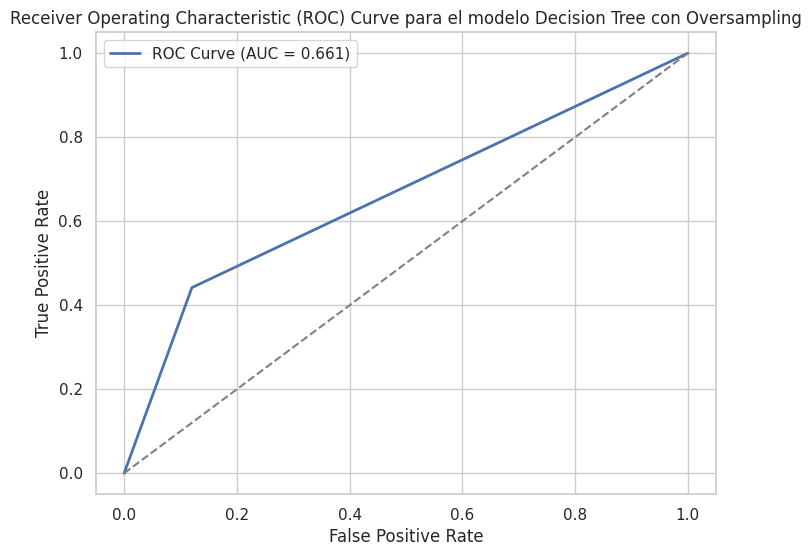

In [ ]:
graficar_roc(target_test_upsampled, predicted_up_tree, 'Decision Tree con Oversampling') # Grafica la curva ROC para el modelo de Árbol de Decisión con Oversampling

### Entrenamiento con Undersampling

Se entrena un `DecisionTreeClassifier` utilizando el conjunto de entrenamiento donde la clase mayoritaria ha sido submuestreada. Esta técnica busca equilibrar las clases reduciendo el número de ejemplos de la clase predominante.

In [ ]:
tree = DecisionTreeClassifier(random_state=12345) # Inicializa un clasificador de árbol de decisión
tree.fit(features_train_downsampled, target_train_downsampled) # Entrena el modelo con los datos de entrenamiento con undersampling

DecisionTreeClassifier(random_state=12345)

In [ ]:
predicted_dw_tree = tree.predict(features_test_downsampled) # Realiza predicciones en el conjunto de prueba con undersampling

In [ ]:
tree_dw_f1, tree_dw_auc = evaluar_modelo(tree, features_test_downsampled, target_test_downsampled) # Evalúa el modelo de árbol de decisión con undersampling

===== Evaluación del Modelo =====
F1 Score: 0.5802
AUC-ROC: 0.6751793209712554

Matriz de Confusión:
[[449 141]
 [131 188]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       590
           1       0.57      0.59      0.58       319

    accuracy                           0.70       909
   macro avg       0.67      0.68      0.67       909
weighted avg       0.70      0.70      0.70       909



### Curva ROC del Árbol de Decisión con Undersampling

Se visualiza la curva ROC para el modelo de Árbol de Decisión entrenado con undersampling, para observar el impacto de esta técnica en la capacidad de discriminación del modelo.

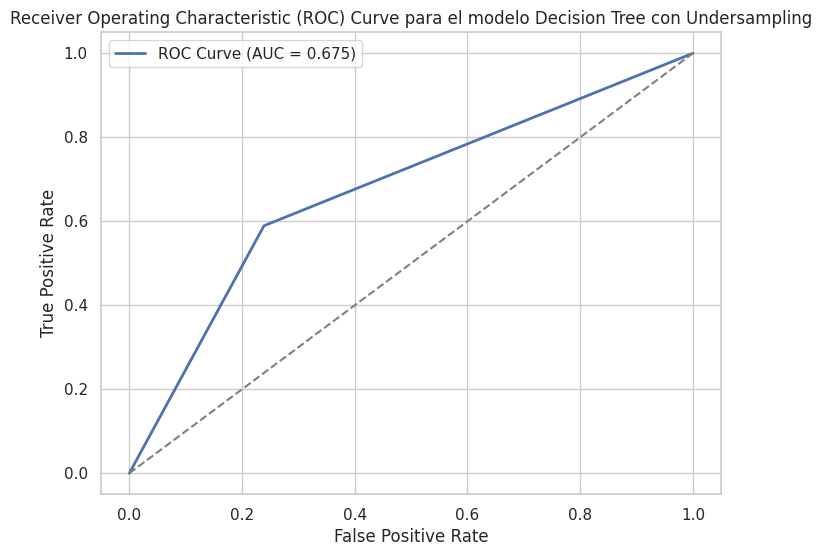

In [ ]:
graficar_roc(target_test_downsampled, predicted_dw_tree, 'Decision Tree con Undersampling') # Grafica la curva ROC para el modelo de Árbol de Decisión con Undersampling

## Comparación de Resultados del Árbol de Decisión

Esta sección presenta una comparación visual de las curvas ROC para el modelo de Árbol de Decisión en los tres escenarios: sin balanceo, con oversampling y con undersampling. Esto permite una evaluación clara de cómo cada técnica de balanceo de clases afecta su rendimiento.

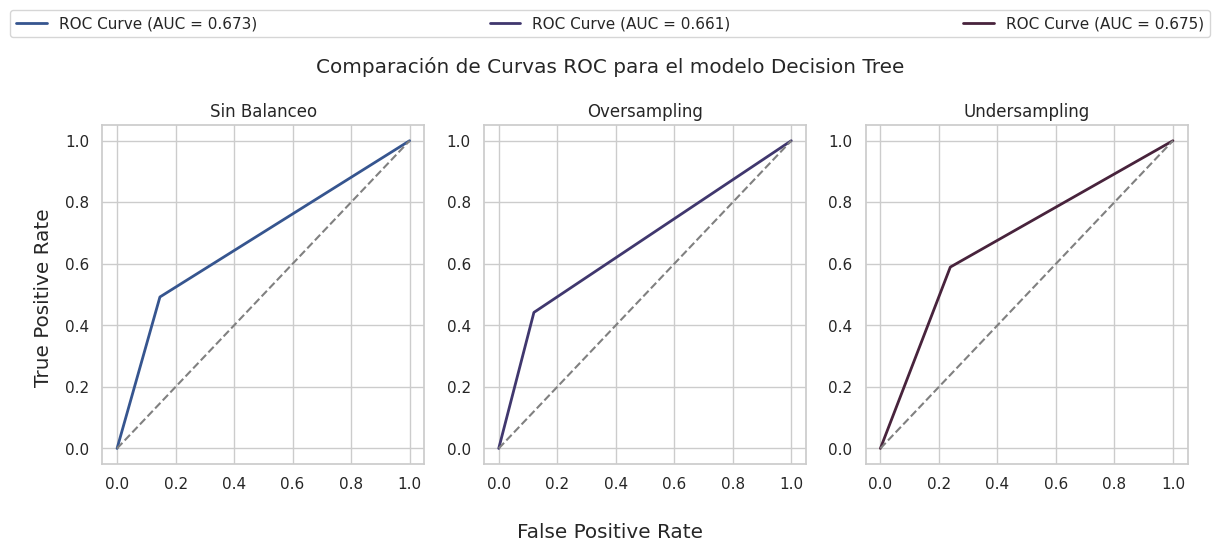

In [ ]:
graficar_comparacion_roc(target_test, target_test_upsampled, target_test_downsampled, tree_predicted, predicted_up_tree, predicted_dw_tree, 'Decision Tree') # Grafica la comparación de curvas ROC para el modelo de Árbol de Decisión con y sin balanceo

## Clasificador de Bosque Aleatorio con Balanceo

Se reentrenará el modelo de Bosque Aleatorio utilizando los conjuntos de entrenamiento balanceados por oversampling y undersampling. Se espera que, dado que el Bosque Aleatorio ya tuvo un buen desempeño sin balancear, estas técnicas potencien aún más su F1-Score y AUC-ROC.

### Entrenamiento con Oversampling

Se entrena el `RandomForestClassifier` con el conjunto de entrenamiento oversampleado. El oversampling debería ayudar al modelo a aprender mejor los patrones de la clase minoritaria al proporcionarle más ejemplos.

In [ ]:
forest = RandomForestClassifier(random_state=12345) # Inicializa un clasificador de Bosque Aleatorio
forest.fit(features_train_upsampled, target_train_upsampled) # Entrena el modelo con los datos de entrenamiento con oversampling

RandomForestClassifier(random_state=12345)

In [ ]:
forest_up_predicted = forest.predict(features_test_upsampled) # Realiza predicciones en el conjunto de prueba con oversampling para Random Forest

In [ ]:
evaluar_modelo(forest, features_test_upsampled, target_test_upsampled) # Evalúa el modelo de Bosque Aleatorio con Oversampling

### Curva ROC del Bosque Aleatorio con Oversampling

Se muestra la curva ROC para el modelo de Bosque Aleatorio con oversampling, lo que permitirá evaluar visualmente si ha mejorado la capacidad de detección de la clase minoritaria.

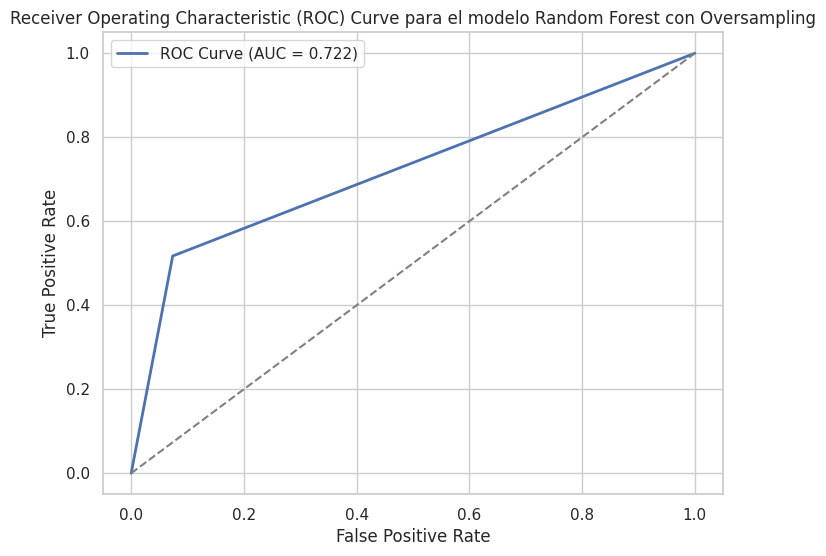

In [ ]:
graficar_roc(target_test_upsampled, forest_up_predicted, 'Random Forest con Oversampling') # Grafica la curva ROC para Random Forest con Oversampling

### Entrenamiento con Undersampling

Se entrena el `RandomForestClassifier` con el conjunto de entrenamiento undersampleado. Esto busca un equilibrio en la clase mayoritaria, reduciendo su dominancia en el proceso de aprendizaje.

In [ ]:
forest = RandomForestClassifier(random_state=12345) # Inicializa un clasificador de Bosque Aleatorio
forest.fit(features_train_downsampled, target_train_downsampled) # Entrena el modelo con los datos de entrenamiento con undersampling

RandomForestClassifier(random_state=12345)

In [ ]:
forest_dw_predicted = forest.predict(features_test_downsampled) # Realiza predicciones en el conjunto de prueba con undersampling para Random Forest

In [239]:
evaluar_modelo(forest, features_test_downsampled, target_test_downsampled) # Evalúa el modelo de Bosque Aleatorio con undersampling

===== Evaluación del Modelo =====
F1 Score: 0.6643
AUC-ROC: 0.8468041018011796

Matriz de Confusión:
[[529  61]
 [130 189]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       590
           1       0.76      0.59      0.66       319

    accuracy                           0.79       909
   macro avg       0.78      0.74      0.76       909
weighted avg       0.79      0.79      0.78       909



(0.664323374340949, np.float64(0.8468041018011796))

### Curva ROC del Bosque Aleatorio con Undersampling

Se visualiza la curva ROC para el modelo de Bosque Aleatorio con undersampling, para analizar su rendimiento discriminatorio con esta técnica de balanceo.

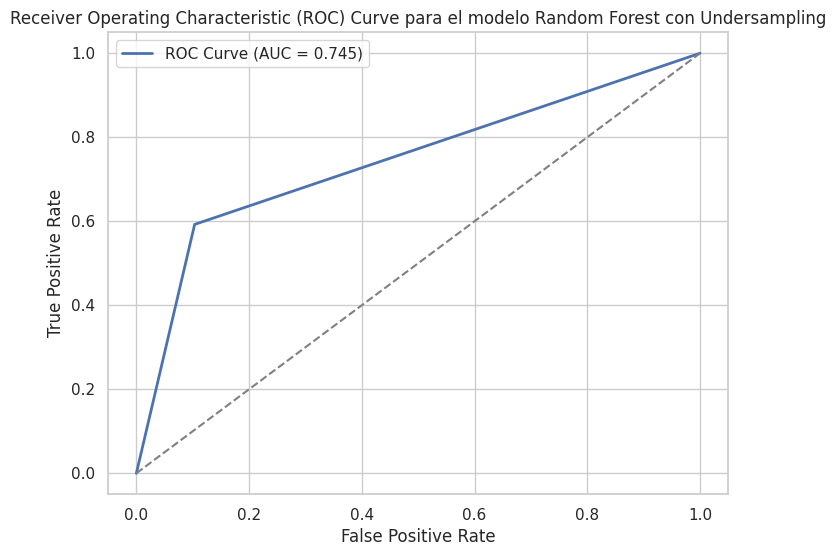

In [ ]:
graficar_roc(target_test_downsampled, forest_dw_predicted, 'Random Forest con Undersampling') # Grafica la curva ROC para Random Forest con Undersampling

## Comparación de Resultados del Bosque Aleatorio

Esta sección presenta una comparación visual de las curvas ROC para el modelo de Bosque Aleatorio en los tres escenarios: sin balanceo, con oversampling y con undersampling. El objetivo es identificar el enfoque de balanceo que maximiza el rendimiento del Bosque Aleatorio.

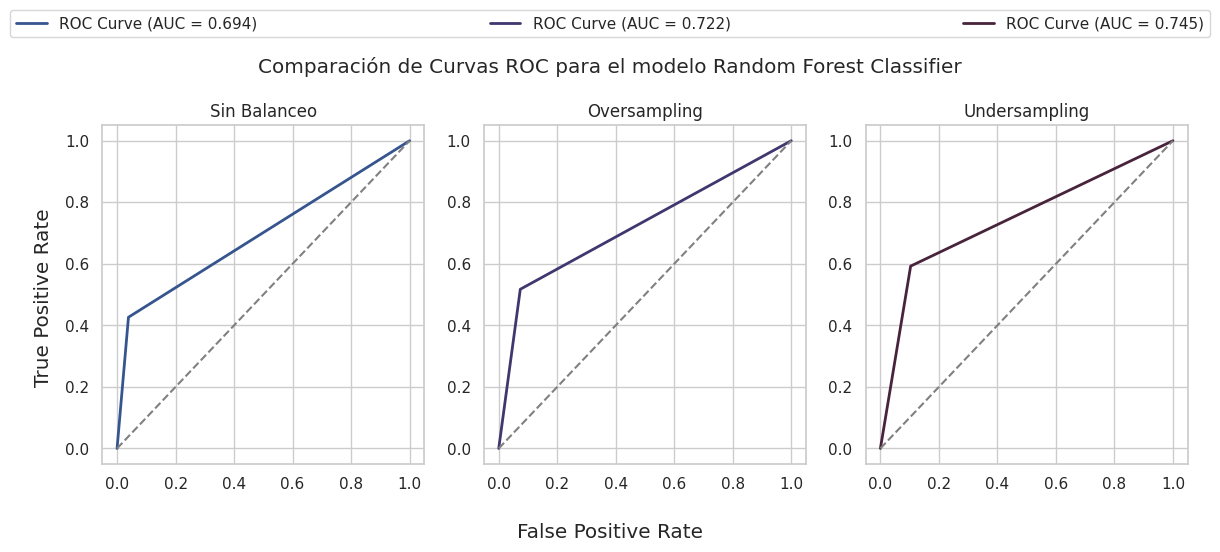

In [ ]:
graficar_comparacion_roc(target_test, target_test_upsampled, target_test_downsampled, forest_predicted, forest_up_predicted, forest_dw_predicted, 'Random Forest Classifier') # Grafica la comparación de curvas ROC para el clasificador de Bosque Aleatorio con y sin balanceo

## Regresión Logística con Balanceo

Se reentrenará el modelo de Regresión Logística utilizando los conjuntos de entrenamiento balanceados por oversampling y undersampling. Dado el bajo rendimiento inicial de la Regresión Logística sin balanceo, se espera que estas técnicas muestren una mejora significativa en su capacidad para predecir la clase minoritaria.

### Entrenamiento con Oversampling

Se entrena el `LogisticRegression` con el conjunto de entrenamiento oversampleado. Esto debería ayudar a la Regresión Logística a aprender mejor la relación con la clase minoritaria.

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear') # Inicializa un modelo de Regresión Logística
model.fit(features_train_upsampled, target_train_upsampled) # Entrena el modelo con los datos de entrenamiento con oversampling

LogisticRegression(random_state=12345, solver='liblinear')

In [ ]:
log_reg_predicted_up = model.predict(features_test_upsampled) # Realiza predicciones en el conjunto de prueba con oversampling para Regresión Logística

In [240]:
evaluar_modelo(model, features_test_upsampled, target_test_upsampled)

===== Evaluación del Modelo =====
F1 Score: 0.7144
AUC-ROC: 0.8442104480820939

Matriz de Confusión:
[[1060  121]
 [1350 1840]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.44      0.90      0.59      1181
           1       0.94      0.58      0.71      3190

    accuracy                           0.66      4371
   macro avg       0.69      0.74      0.65      4371
weighted avg       0.80      0.66      0.68      4371



(0.7144243836148321, np.float64(0.8442104480820939))

### Curva ROC de la Regresión Logística con Oversampling

Se visualiza la curva ROC para la Regresión Logística entrenada con oversampling, para evaluar el impacto de esta técnica en su rendimiento.

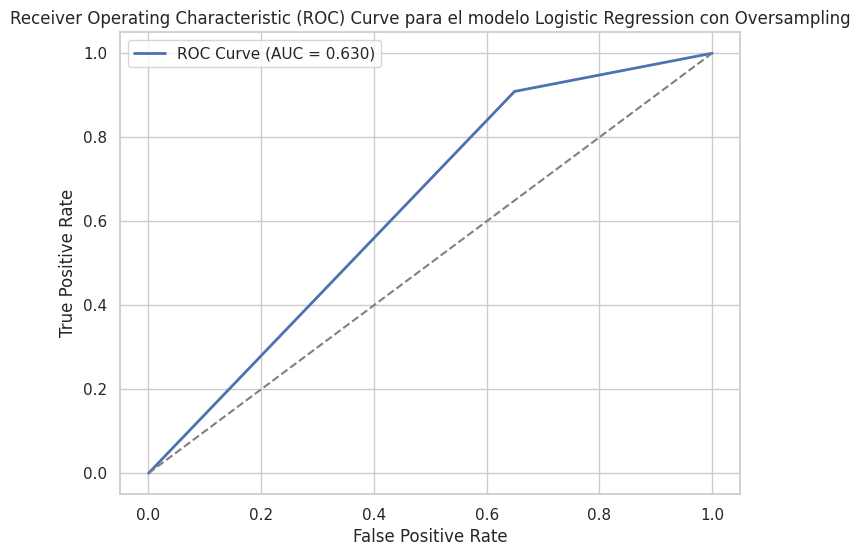

In [ ]:
graficar_roc(target_test_upsampled, log_reg_predicted_up, 'Logistic Regression con Oversampling') # Grafica la curva ROC para Regresión Logística con Oversampling

### Entrenamiento con Undersampling

Se entrena el `LogisticRegression` con el conjunto de entrenamiento undersampleado. Esta técnica ajusta el peso de la clase mayoritaria para que la Regresión Logística no se incline a predecir siempre la clase más frecuente.

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear') # Inicializa un modelo de Regresión Logística
model.fit(features_train_downsampled, target_train_downsampled) # Entrena el modelo con los datos de entrenamiento con undersampling

LogisticRegression(random_state=12345, solver='liblinear')

In [ ]:
log_reg_predicted_dw = model.predict(features_test_downsampled) # Realiza predicciones en el conjunto de prueba con undersampling para Regresión Logística

In [241]:
evaluar_modelo(model, features_test_downsampled, target_test_downsampled)

===== Evaluación del Modelo =====
F1 Score: 0.6525
AUC-ROC: 0.8410073853674087

Matriz de Confusión:
[[529  61]
 [135 184]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       590
           1       0.75      0.58      0.65       319

    accuracy                           0.78       909
   macro avg       0.77      0.74      0.75       909
weighted avg       0.78      0.78      0.78       909



(0.6524822695035462, np.float64(0.8410073853674087))

### Curva ROC de la Regresión Logística con Undersampling

Se visualiza la curva ROC para la Regresión Logística entrenada con undersampling, para analizar su desempeño con esta estrategia de balanceo.

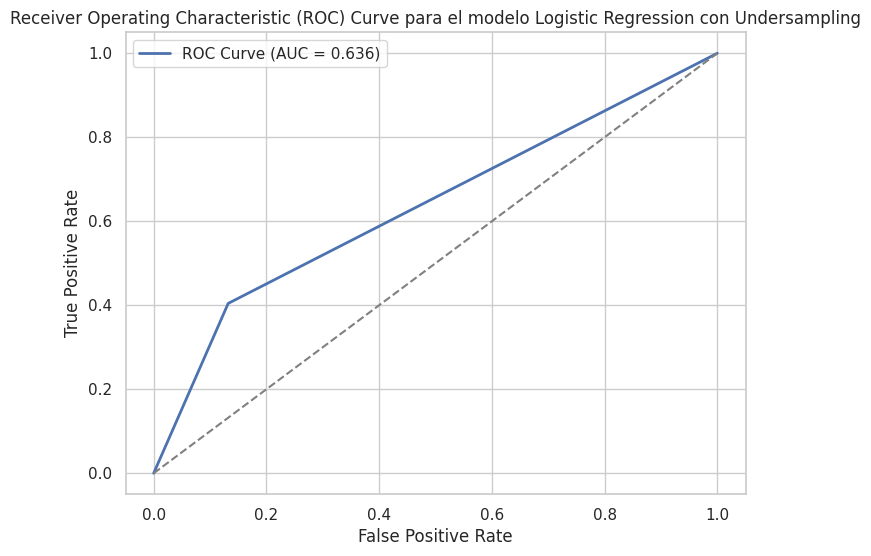

In [ ]:
graficar_roc(target_test_downsampled, log_reg_predicted_dw, 'Logistic Regression con Undersampling') # Grafica la curva ROC para Regresión Logística con Undersampling

## Comparación de Resultados de la Regresión Logística

Esta sección presenta una comparación visual de las curvas ROC para el modelo de Regresión Logística en los tres escenarios: sin balanceo, con oversampling y con undersampling. Esta comparación es crucial para determinar qué técnica de balanceo de clases es más efectiva para mejorar el rendimiento de la Regresión Logística en este problema.

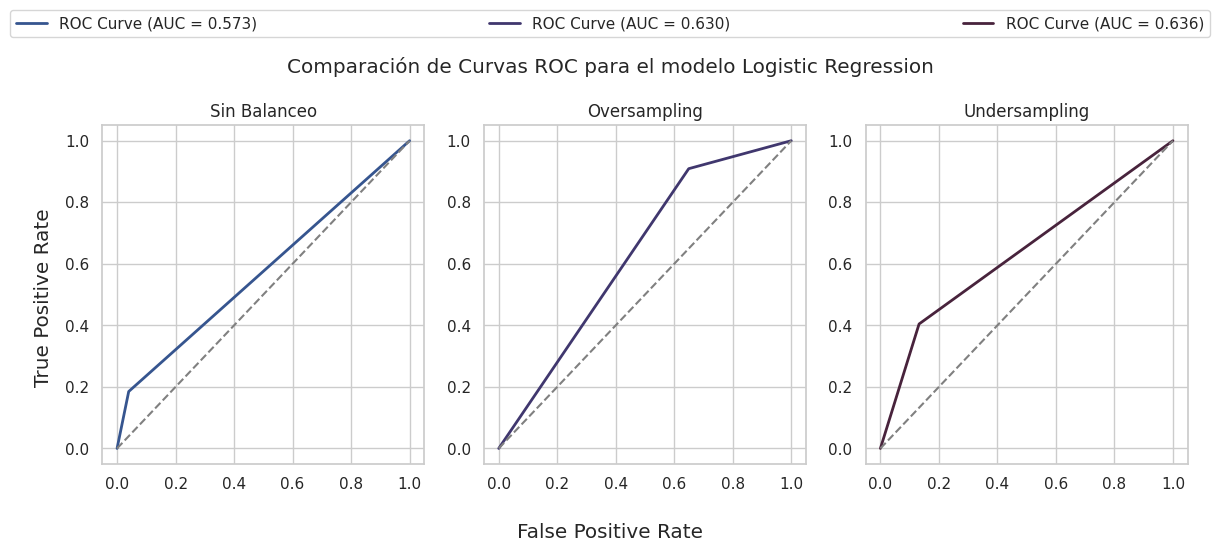

In [ ]:
graficar_comparacion_roc(target_test, target_test_upsampled, target_test_downsampled, log_reg_predicted, log_reg_predicted_up, log_reg_predicted_dw, 'Logistic Regression') # Grafica la comparación de curvas ROC para la Regresión Logística con y sin balanceo

# Optimización de Hiperparámetros (Hyperparameter Tuning)

Después de probar los modelos con y sin balanceo de clases, se procede a la optimización de hiperparámetros. El objetivo es encontrar la combinación de hiperparámetros que maximice el F1-Score en el conjunto de validación para el mejor modelo identificado hasta ahora (probablemente el Random Forest con una de las técnicas de balanceo). Se registrarán los F1-Scores para cada combinación probada.

### Almacenamiento de Resultados de Hyperparameter Tuning

Se inicializa un diccionario para almacenar los resultados de la búsqueda de hiperparámetros. Este diccionario guardará el nombre del modelo, el número de estimadores, la profundidad máxima y el F1-Score obtenido para cada combinación de hiperparámetros probada, lo que facilitará la identificación del mejor modelo y configuración.

In [ ]:
best_parameters = { # Inicializa un diccionario para almacenar los mejores hiperparámetros y F1-Score
    'Modelo': [],
    'Numero de Estimadores': [],
    'Profundidad Máxima': [],
    'F1 Score': []
}

### Optimización con Oversampling

Se realizará una búsqueda de hiperparámetros para el modelo `RandomForestClassifier` utilizando el conjunto de entrenamiento balanceado con oversampling. Se explorarán diferentes valores para `n_estimators` (número de árboles en el bosque) y `max_depth` (profundidad máxima de cada árbol) para encontrar la configuración que produce el F1-Score más alto en el conjunto de validación. Los resultados de cada combinación se registrarán.

In [ ]:
for est in range(10, 61, 10): # Itera sobre diferentes números de estimadores para el Bosque Aleatorio
    # Iterar sobre diferentes profundidades máximas para el Bosque Aleatorio
    for depth in range(1, 61): # Itera sobre diferentes profundidades máximas
        # Inicializar el modelo de Bosque Aleatorio con el número de estimadores y profundidad actuales
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # Crea una instancia del modelo RandomForestClassifier
        # Entrenar el modelo con los datos de entrenamiento
        model.fit(features_train_upsampled, target_train_upsampled) # Entrena el modelo con los datos de entrenamiento con oversampling
        # Realizar predicciones en el conjunto de validación
        predictions_valid = model.predict(features_valid) # Realiza predicciones en el conjunto de validación
        # Calcular la exactitud del modelo
        result = f1_score(target_valid, predictions_valid) # Calcula el F1-Score en el conjunto de validación
        # Imprimir la exactitud para la combinación actual de hiperparámetros
        print(f"Accuracy del modelo de bosque aleatorio con {est} estimadores y profundidad {depth}: {round(result*100, 2)} %") # Imprime el F1-Score para la combinación actual de hiperparámetros

        best_parameters['Modelo'].append('Random Forest Classifier Oversampling') # Almacena el nombre del modelo
        best_parameters['Numero de Estimadores'].append(est) # Almacena el número de estimadores
        best_parameters['Profundidad Máxima'].append(depth) # Almacena la profundidad máxima
        best_parameters['F1 Score'].append(result) # Almacena el F1-Score

Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 1: 33.98 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 2: 33.98 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 3: 40.66 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 4: 42.34 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 5: 43.5 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 6: 45.72 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 7: 48.59 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 8: 49.21 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 9: 52.07 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 10: 53.77 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 11: 55.61 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 12

### Optimización con Undersampling

Se realizará una búsqueda de hiperparámetros para el modelo `RandomForestClassifier` utilizando el conjunto de entrenamiento balanceado con undersampling. Similar al oversampling, se explorarán diferentes valores para `n_estimators` y `max_depth` para identificar la configuración óptima que maximice el F1-Score en el conjunto de validación. Los resultados de cada combinación se registrarán para su posterior análisis y comparación.

In [ ]:
for est in range(10, 61, 10): # Itera sobre diferentes números de estimadores para el Bosque Aleatorio
    # Iterar sobre diferentes profundidades máximas para el Bosque Aleatorio
    for depth in range(1, 61): # Itera sobre diferentes profundidades máximas
        # Inicializar el modelo de Bosque Aleatorio con el número de estimadores y profundidad actuales
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # Crea una instancia del modelo RandomForestClassifier
        # Entrenar el modelo con los datos de entrenamiento
        model.fit(features_train_downsampled, target_train_downsampled) # Entrena el modelo con los datos de entrenamiento con undersampling
        # Realizar predicciones en el conjunto de validación
        predictions_valid = model.predict(features_valid) # Realiza predicciones en el conjunto de validación
        # Calcular la exactitud del modelo
        result = f1_score(target_valid, predictions_valid) # Calcula el F1-Score en el conjunto de validación
        # Imprimir la exactitud para la combinación actual de hiperparámetros
        print(f"Accuracy del modelo de bosque aleatorio con {est} estimadores y profundidad {depth}: {round(result*100, 2)} %") # Imprime el F1-Score para la combinación actual de hiperparámetros

        best_parameters['Modelo'].append('Random Forest Classifier Undersampling') # Almacena el nombre del modelo
        best_parameters['Numero de Estimadores'].append(est) # Almacena el número de estimadores
        best_parameters['Profundidad Máxima'].append(depth) # Almacena la profundidad máxima
        best_parameters['F1 Score'].append(result) # Almacena el F1-Score

Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 1: 21.84 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 2: 37.37 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 3: 53.39 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 4: 59.58 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 5: 61.03 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 6: 60.48 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 7: 59.38 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 8: 60.52 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 9: 60.76 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 10: 59.22 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 11: 61.93 %
Accuracy del modelo de bosque aleatorio con 10 estimadores y profundidad 1

## Mejor Modelo y Hiperparámetros Encontrados

Después de ejecutar la búsqueda exhaustiva de hiperparámetros para el `RandomForestClassifier` con ambos métodos de balanceo (oversampling y undersampling), se identifican y se muestran los hiperparámetros del modelo que lograron el F1-Score más alto en el conjunto de validación. Esta es la configuración óptima para el modelo seleccionado.

In [ ]:
print('Mejores hiperparámetros:', best_parameters['Modelo'][best_parameters['F1 Score'].index(max(best_parameters['F1 Score']))]) # Imprime el modelo con el mejor F1-Score
print('Número de estimadores:', best_parameters['Numero de Estimadores'][best_parameters['F1 Score'].index(max(best_parameters['F1 Score']))]) # Imprime el número de estimadores del mejor modelo
print('Profundidad máxima:', best_parameters['Profundidad Máxima'][best_parameters['F1 Score'].index(max(best_parameters['F1 Score']))]) # Imprime la profundidad máxima del mejor modelo
print('F1 Score:', max(best_parameters['F1 Score'])) # Imprime el F1-Score más alto encontrado

Mejores hiperparámetros: Random Forest Classifier Undersampling
Número de estimadores: 60
Profundidad máxima: 11
F1 Score: 0.6412478336221837


### Entrenamiento del Modelo Final con Hiperparámetros Óptimos

Una vez identificados los mejores hiperparámetros, se entrena el `RandomForestClassifier` final utilizando la configuración óptima (n_estimators=60, max_depth=11) y el conjunto de entrenamiento balanceado con undersampling. Este modelo es el que se utilizará para la prueba final.

In [ ]:
modelo_final = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=11) # Inicializa el modelo final con los mejores hiperparámetros encontrados
modelo_final.fit(features_train_downsampled, target_train_downsampled) # Entrena el modelo final con los datos de entrenamiento con undersampling

RandomForestClassifier(max_depth=11, n_estimators=60, random_state=12345)

### Curva ROC del Modelo Final en el Conjunto de Validación

Se grafica la curva ROC para el modelo final (RandomForestClassifier con Undersampling y hiperparámetros optimizados) en el conjunto de validación. Esto proporciona una verificación visual de su rendimiento discriminatorio antes de la prueba final en el conjunto de prueba no visto.

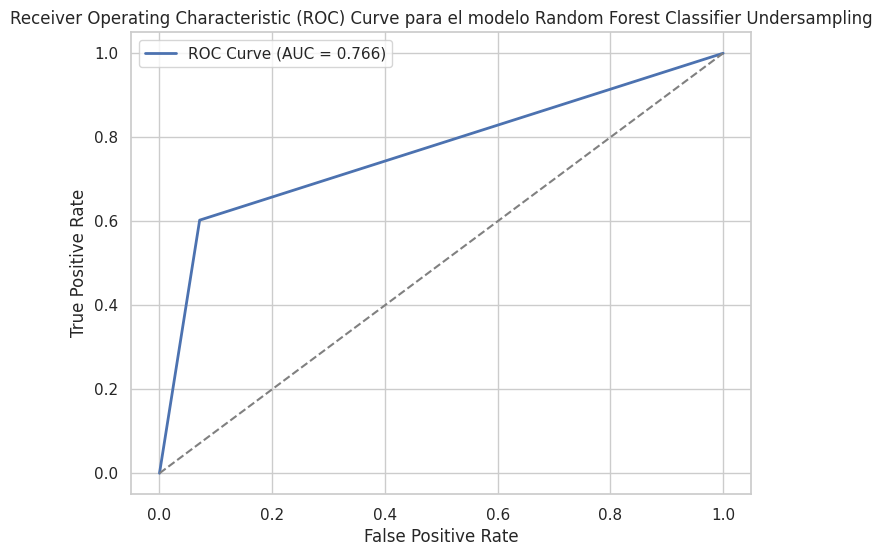

In [ ]:
graficar_roc(target_valid, modelo_final.predict(features_valid), 'Random Forest Classifier Undersampling') # Grafica la curva ROC para el modelo final en el conjunto de validación